# Laptimes scatterplot by driver

This will eventually be a [small multiples plot](https://en.wikipedia.org/wiki/Small_multiple) showing individual driver
performances in a session, compared to each other.

The plots themselves will be [scatterplots of lap times within a session](../examples/laptimes-scatterplot.ipynb).

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

driver1 = 'VER'
driver4 = 'NOR'
driver44 = 'HAM'
race = 'Imola'
season = 2025
session = 'R'

In [27]:
race = fastf1.get_session(season, race, session)
race.load()

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '44', '23', '16', '63', '55', '6', '22', '14', '27', '10', '30', '18', '43', '87', '5', '12', '31']


In [28]:
base_laps = race.laps.pick_quicklaps().reset_index()
d1_laps = race.laps.pick_drivers(driver1).pick_quicklaps().reset_index()
d4_laps = race.laps.pick_drivers(driver4).pick_quicklaps().reset_index()
d44_laps = race.laps.pick_drivers(driver44).pick_quicklaps().reset_index()

In [29]:
transformed_laps = base_laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = base_laps["LapTime"].dt.total_seconds()

team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.get_team_color(team, session=race)
                for team in team_order}

Index(['McLaren', 'Ferrari', 'Red Bull Racing', 'Williams', 'Mercedes',
       'Racing Bulls', 'Alpine', 'Aston Martin', 'Haas F1 Team',
       'Kick Sauber'],
      dtype='object', name='Team')


In [30]:
base_laps

,index,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0,0 days 00:57:22.345000,VER,1,0 days 00:01:22.992000,1.0,1.0,NaT,NaT,NaT,...,True,Red Bull Racing,0 days 00:55:59.147000,2025-05-18 13:03:33.062,1,1.0,False,,False,False
1,1,0 days 00:58:43.476000,VER,1,0 days 00:01:21.131000,2.0,1.0,NaT,NaT,0 days 00:00:26.069000,...,True,Red Bull Racing,0 days 00:57:22.345000,2025-05-18 13:04:56.260,1,1.0,False,,False,True
2,2,0 days 01:00:04.734000,VER,1,0 days 00:01:21.258000,3.0,1.0,NaT,NaT,0 days 00:00:26.064000,...,True,Red Bull Racing,0 days 00:58:43.476000,2025-05-18 13:06:17.391,1,1.0,False,,False,True
3,3,0 days 01:01:25.952000,VER,1,0 days 00:01:21.218000,4.0,1.0,NaT,NaT,0 days 00:00:26.005000,...,True,Red Bull Racing,0 days 01:00:04.734000,2025-05-18 13:07:38.649,1,1.0,False,,False,True
4,4,0 days 01:02:47.180000,VER,1,0 days 00:01:21.228000,5.0,1.0,NaT,NaT,0 days 00:00:26.032000,...,True,Red Bull Racing,0 days 01:01:25.952000,2025-05-18 13:08:59.867,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1202,0 days 02:22:43.989000,BEA,87,0 days 00:01:20.165000,59.0,3.0,NaT,NaT,0 days 00:00:25.171000,...,True,Haas F1 Team,0 days 02:21:23.824000,2025-05-18 14:28:57.739,1,17.0,False,,False,True
943,1203,0 days 02:24:04.314000,BEA,87,0 days 00:01:20.325000,60.0,3.0,NaT,NaT,0 days 00:00:25.261000,...,True,Haas F1 Team,0 days 02:22:43.989000,2025-05-18 14:30:17.904,1,17.0,False,,False,True
944,1204,0 days 02:25:24.733000,BEA,87,0 days 00:01:20.419000,61.0,3.0,NaT,NaT,0 days 00:00:24.972000,...,True,Haas F1 Team,0 days 02:24:04.314000,2025-05-18 14:31:38.229,1,17.0,False,,False,True
945,1205,0 days 02:26:45.604000,BEA,87,0 days 00:01:20.871000,62.0,3.0,NaT,NaT,0 days 00:00:25.111000,...,True,Haas F1 Team,0 days 02:25:24.733000,2025-05-18 14:32:58.648,1,17.0,False,,False,True


In [31]:
base_laps.columns

Index(['index', 'Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber',
       'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate'],
      dtype='object')

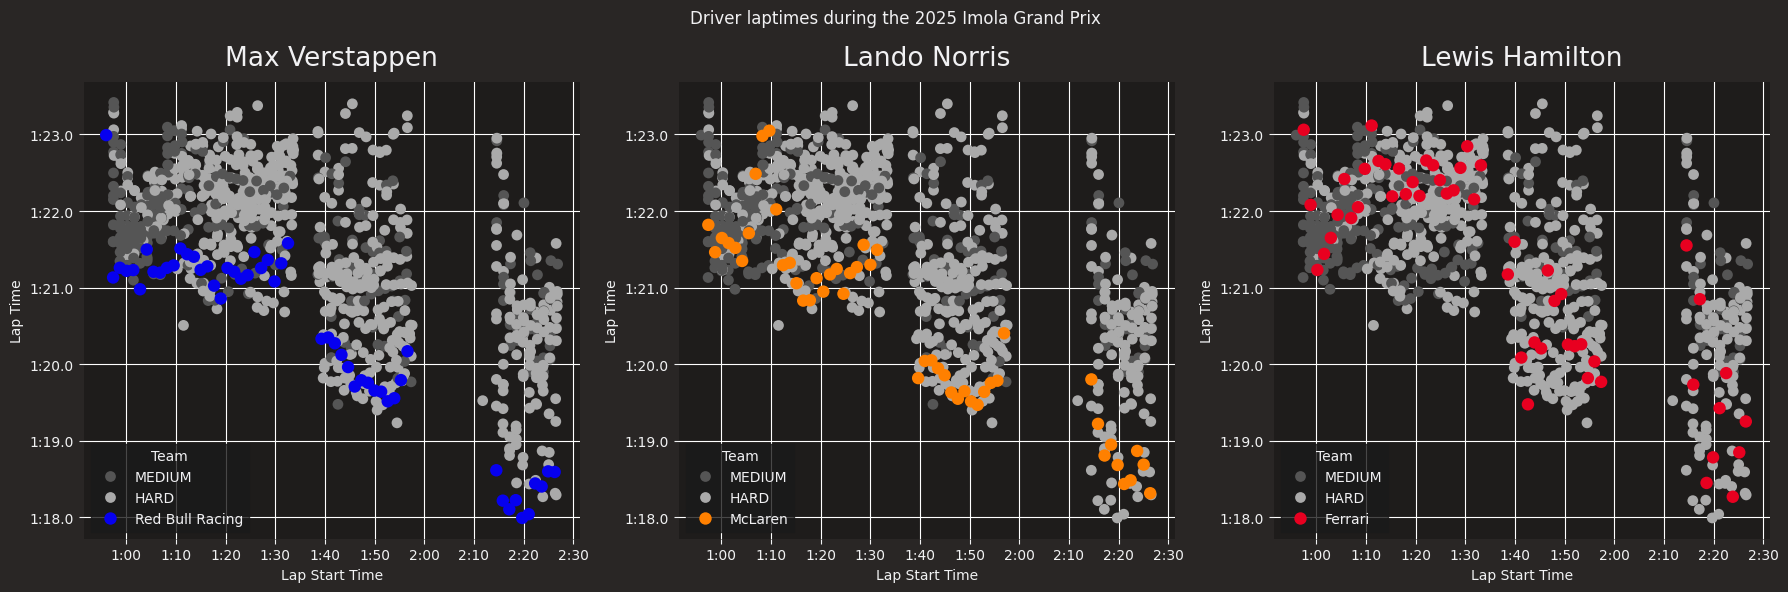

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Max Verstappen
sns.scatterplot(
  data=base_laps,
  x="LapStartTime",
  y="LapTime",
  ax=ax1,
  hue="Compound",
  palette="gray",
  s=60,
  linewidth=0,
  legend='auto'
)

sns.scatterplot(
  data=d1_laps,
  x="LapStartTime",
  y="LapTime",
  ax=ax1,
  hue="Team",
  palette=team_palette,
  s=80,
  linewidth=0,
  legend='auto'
)

# Lando Norris
sns.scatterplot(
  data=base_laps,
  x="LapStartTime",
  y="LapTime",
  ax=ax2,
  hue="Compound",
  palette="gray",
  s=60,
  linewidth=0,
  legend='auto'
)

sns.scatterplot(
  data=d4_laps,
  x="LapStartTime",
  y="LapTime",
  ax=ax2,
  hue="Team",
  palette=team_palette,
  s=80,
  linewidth=0,
  legend='auto'
)

# Lewis Hamilton
sns.scatterplot(
  data=base_laps,
  x="LapStartTime",
  y="LapTime",
  ax=ax3,
  hue="Compound",
  palette="gray",
  s=60,
  linewidth=0,
  legend='auto'
)

sns.scatterplot(
  data=d44_laps,
  x="LapStartTime",
  y="LapTime",
  ax=ax3,
  hue="Team",
  palette=team_palette,
  s=80,
  linewidth=0,
  legend='auto'
)

ax1.set_title("Max Verstappen")
ax1.set_xlabel("Lap Start Time")
ax1.set_ylabel("Lap Time")
ax1.invert_yaxis()

ax2.set_title("Lando Norris")
ax2.set_xlabel("Lap Start Time")
ax2.set_ylabel("Lap Time")
ax2.invert_yaxis()

ax3.set_title("Lewis Hamilton")
ax3.set_xlabel("Lap Start Time")
ax3.set_ylabel("Lap Time")
ax3.invert_yaxis()

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis

plt.suptitle("Driver laptimes during the 2025 Imola Grand Prix")

# Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')
ax2.grid(color='w', which='major', axis='both')
ax3.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


---

This is the end of the notebook.